## This is a practice to use machine learning to predict admission using a dataset (http://www.ats.ucla.edu/stat/data/binary.csv)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
cd "C:\Users\Zhenning\Documents\Code\practice"

C:\Users\Zhenning\Documents\Code\practice


In [43]:
df = pd.read_csv("binary.csv")  # this dataset can be feteched from "http://www.ats.ucla.edu/stat/data/binary.csv"

In [44]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 15.6 KB


In [46]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [47]:
df.shape

(400, 4)

In [48]:
# rename "rank" column to avoid a confliction with a dataframe method rank
col_names = ["admit", "gre", "gpa", "reputation"]
df.columns = col_names
df.head()

,admit,gre,gpa,reputation
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Dataset summary and look at data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000177A9518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017ED06D8>]], dtype=object)

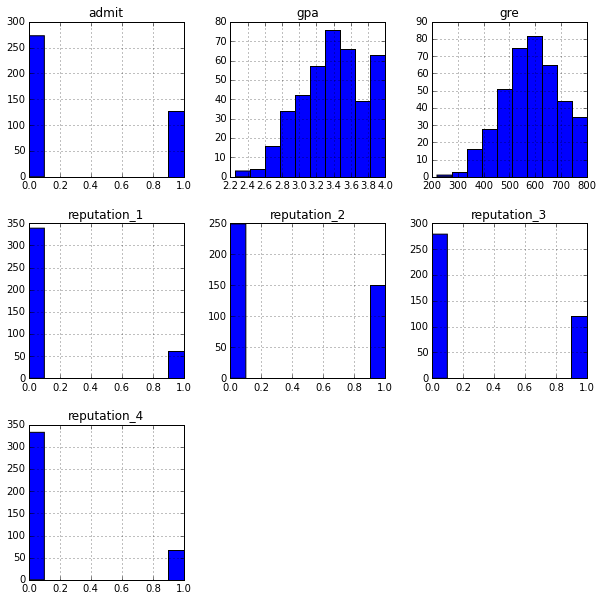

In [150]:
# plot each feature 
df.hist(figsize = (10, 10))

### The admission column, which is our label for data point, has uneven number of two groups. For machine learning, it may be worhtwile to create stratified splits for cross validation instead of simple train and test set split. 

In [133]:
# calculate the majority class prediction accuracy
admit_group = df.groupby( "admit")

In [134]:
admit.describe()

gpa         gre  reputation_1  reputation_2  reputation_3  \
admit                                                                           
0     count  273.000000  273.000000    273.000000    273.000000    273.000000   
      mean     3.343700  573.186813      0.102564      0.355311      0.340659   
      std      0.377133  115.830243      0.303946      0.479487      0.474801   
      min      2.260000  220.000000      0.000000      0.000000      0.000000   
      25%      3.080000  500.000000      0.000000      0.000000      0.000000   
      50%      3.340000  580.000000      0.000000      0.000000      0.000000   
      75%      3.610000  660.000000      0.000000      1.000000      1.000000   
      max      4.000000  800.000000      1.000000      1.000000      1.000000   
1     count  127.000000  127.000000    127.000000    127.000000    127.000000   
      mean     3.489213  618.897638      0.259843      0.425197      0.220472   
      std      0.370177  108.884884      0.440285      0.496331      0.416207   
      min      2.420000  300.000000      0.000000      0.000000      0.000000   
      25%      3.220000  540.000000      0.000000      0.000000      0.000000   
      50%      3.540000  620.000000      0.000000      0.000000      0.000000   
      75%      3.755000  680.000000      1.000000      1.000000      0.000000   
      max      4.000000  800.000000      1.000000      1.000000      1.000000   

             reputation_4  
admit                      
0     count    273.000000  
      mean       0.201465  
      std        0.401831  
      min        0.000000  
      25%        0.000000  
      50%        0.000000  
      75%        0.000000  
      max        1.000000  
1     count    127.000000  
      mean       0.094488  
      std        0.293665  
      min        0.000000  
      25%        0.000000  
      50%        0.000000  
      75%        0.000000  
      max        1.000000

In [136]:
majority_class_pred = 127 /273.0
print "majority class prediction", majority_class_pred

majority class prediction 0.465201465201


admit
0    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

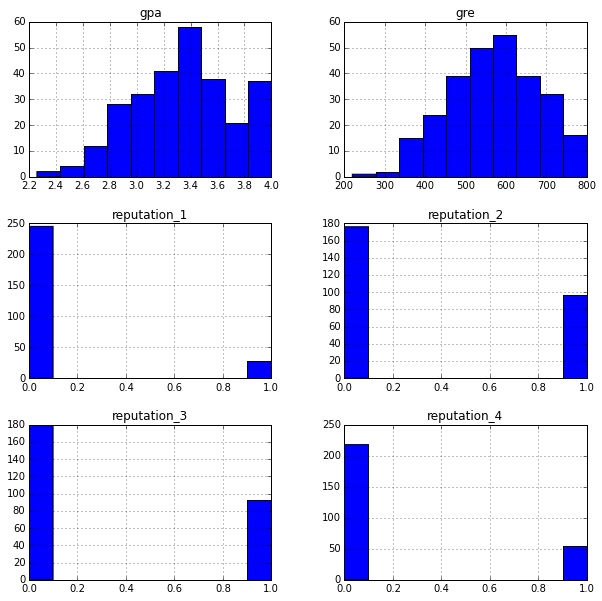

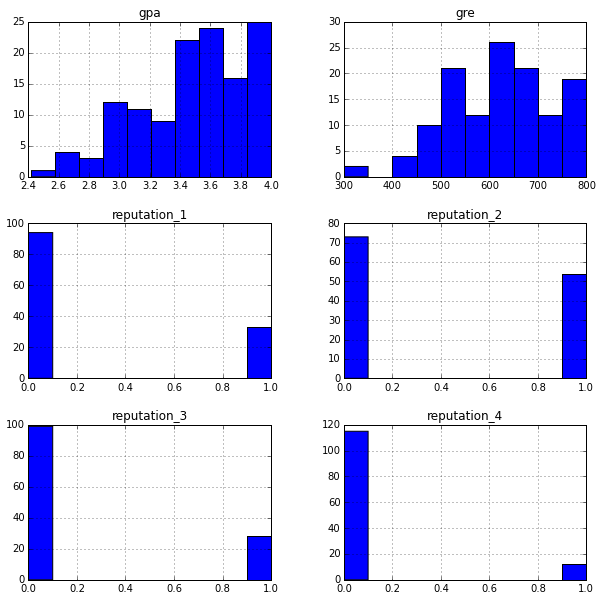

In [152]:
df.groupby("admit").hist(figsize = (10,10))

## Feature engineering: dummy variables

In [50]:
dummy_rep = pd.get_dummies(df["reputation"], prefix = "reputation")

In [51]:
dummy_rep.head()

,reputation_1,reputation_2,reputation_3,reputation_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [52]:
df = df.drop('reputation', axis = 1)  # drop the original reputation column
df = df.join(dummy_rep)
df.head()

,admit,gre,gpa,reputation_1,reputation_2,reputation_3,reputation_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


## Split dataset for training model

In [53]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split

In [54]:
X = df[["gre", "gpa", "reputation_1", "reputation_2", "reputation_3", "reputation_4"]]
y = df["admit"]

In [55]:
sss = StratifiedShuffleSplit(y, n_iter = 10, test_size = 0.1, random_state = 0)

In [58]:
# another way is to create simple train, test set split 
X_train, X_test = train_test_split(X, test_size = 0.3, random_state = 0)
y_train, y_test = train_test_split(y, test_size = 0.3, random_state =0)

## Test a few machine learning algorithms

In [113]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [68]:
# Scale data between 0 and 1
mms = MinMaxScaler()
mms.fit(X)
X = mms.transform(X)


### 1. Logistic regression

In [117]:
# evaluate logistic regression using stratified split
log_clf= LogisticRegression()

log_sss_scores = cross_val_score(log_clf, X, y,  cv = sss)
print "Score for sss:", log_sss_scores.mean()

Score for sss: 0.69


In [112]:
log_clf.fit(X_train, y_train)
print'Coefficients: \n', lr_clf.coef_
print "Score:", log_clf.score(X_test, y_test)

Coefficients: 
[[  7.45518190e-04   1.92825727e-01   5.63748178e-01  -1.59903221e-01
   -7.78103165e-01  -1.12560453e+00]]
Score: 0.7


### 2. Naive Bayes 

In [116]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
print "Score:", nb_clf.score(X_test, y_test)

Score: 0.675


In [115]:
nb_sss_score = cross_val_score(nb_clf, X, y,  cv = sss)
print "Score for sss:", nb_sss_score.mean()

Score for sss: 0.6725


### 3. Decision tree

In [91]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print "Score:", dt_clf.score(X_test, y_test)

Score: 0.533333333333


In [118]:
dt_sss_score = cross_val_score(dt_clf, X, y,  cv = sss)
print "Score for sss:", dt_sss_score.mean()

Score for sss: 0.5975


### 4. Adaboost

In [119]:
# Ensemble method, Adaboost
n_estimators = [1, 5, 10, 20, 50]
for i in n_estimators:
    clf = AdaBoostClassifier(n_estimators = i)
    clf.fit(X_train, y_train)
    print "Score for {} estimators: {}".format(i, clf.score(X_test, y_test))

Score for 1 estimators: 0.683333333333
Score for 5 estimators: 0.691666666667
Score for 10 estimators: 0.675
Score for 20 estimators: 0.65
Score for 50 estimators: 0.658333333333


In [120]:
adaboost_clf = AdaBoostClassifier(n_estimators = 5)  # use n_estimator = 5 for best performance
adaboost_sss_score = cross_val_score(adaboost_clf, X, y,  cv = sss)
print "Score for sss:", adaboost_sss_score.mean()

Score for sss: 0.6725
